In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
sns.set(style="whitegrid")

In [58]:
df_train = pd.read_csv("../data/extended_train.csv", sep="|")


In [59]:
def score_function(y_test, y_pred):
  accuracy = metrics.accuracy_score(y_test, y_pred)
  confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
  f2_score = (0 if all(y_pred == 0) else metrics.fbeta_score(y_test, y_pred, beta=2) )
  dmc_score =  np.sum(confusion_matrix *np.array([[0, -25],[ -5, 5]]))
  
  return accuracy, f2_score, dmc_score, confusion_matrix


In [60]:
df_train.head()
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 11 columns):
trustLevel                   1879 non-null int64
totalScanTimeInSeconds       1879 non-null int64
grandTotal                   1879 non-null float64
lineItemVoids                1879 non-null int64
scansWithoutRegistration     1879 non-null int64
quantityModifications        1879 non-null int64
scannedLineItemsPerSecond    1879 non-null float64
valuePerSecond               1879 non-null float64
lineItemVoidsPerPosition     1879 non-null float64
fraud                        1879 non-null int64
totalScannedLineItems        1879 non-null float64
dtypes: float64(5), int64(6)
memory usage: 161.6 KB


In [61]:
df_cpy = df_train.copy()
scaler = StandardScaler()
df_cpy[['trustLevel','totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'quantityModifications', 'scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition', 'totalScannedLineItems']] = scaler.fit_transform(df_cpy[['trustLevel','totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'quantityModifications', 'scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition', 'totalScannedLineItems']])


c:\users\theur\documents\uni\master\dmc19\venv\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\theur\documents\uni\master\dmc19\venv\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


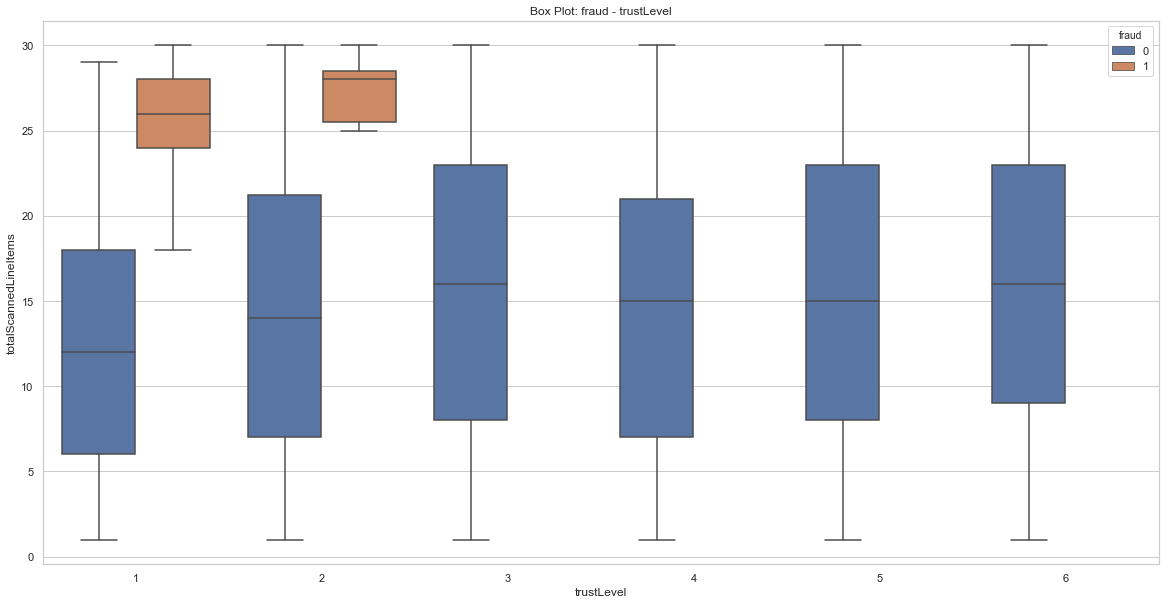

In [62]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(x="trustLevel", y='totalScannedLineItems',hue='fraud', data=df_train)
plt.title("Box Plot: fraud - trustLevel")
plt.show()

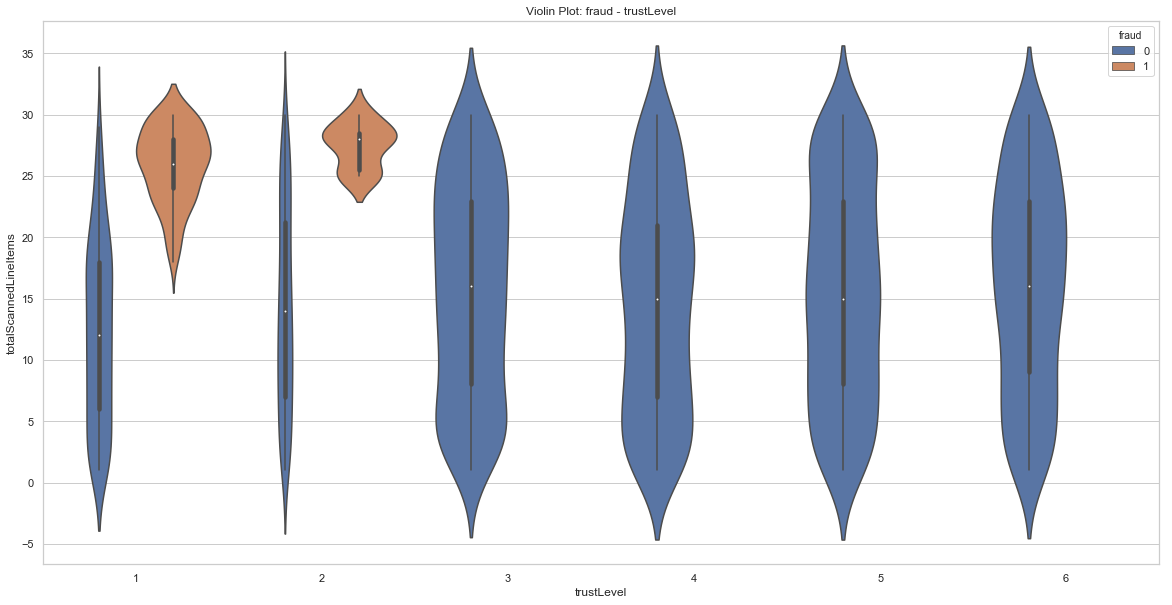

In [63]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.violinplot(x="trustLevel", y='totalScannedLineItems',hue='fraud', data=df_train)
plt.title("Violin Plot: fraud - trustLevel")
plt.show()

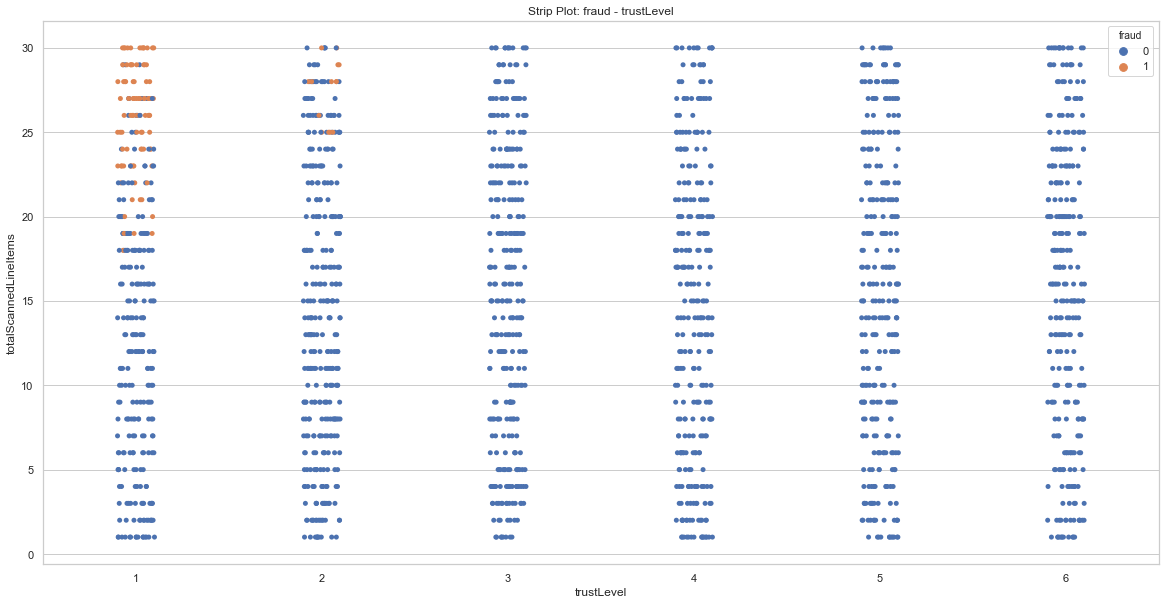

In [64]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.stripplot(x="trustLevel", y='totalScannedLineItems',hue='fraud', data=df_train)
plt.title("Strip Plot: fraud - trustLevel")
plt.show()

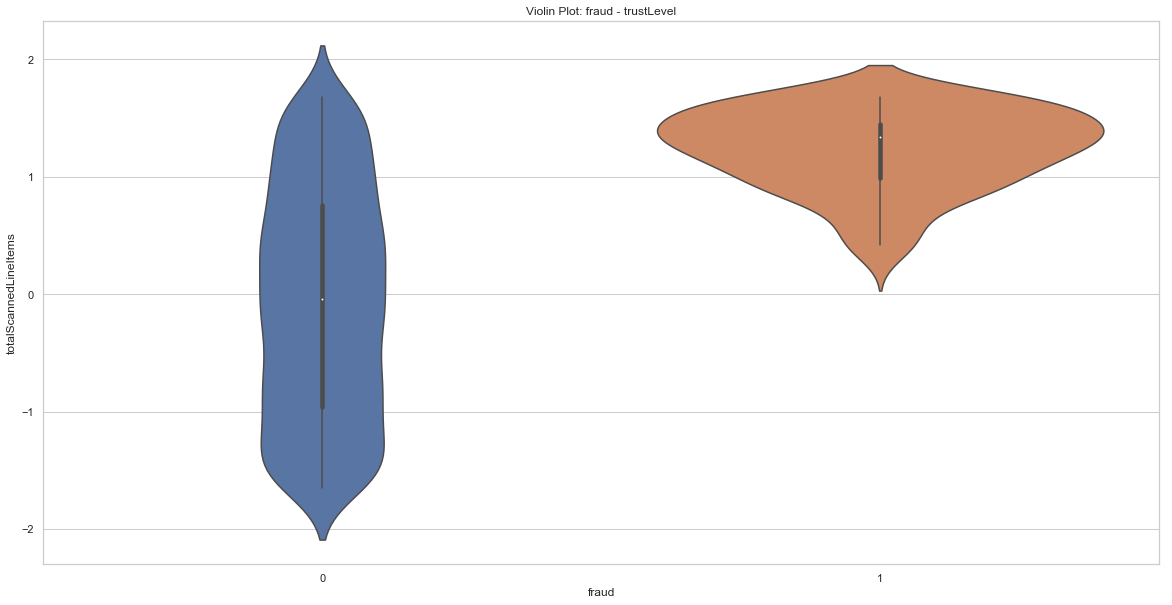

In [65]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.violinplot(x="fraud", y='totalScannedLineItems', data=df_cpy)
plt.title("Violin Plot: fraud - trustLevel")
plt.show()

In [36]:
df_cpy.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,totalScannedLineItems
0,0.935189,0.229898,0.132567,0.443466,-1.562415,0.280068,-0.109983,-0.120670,-0.379855,0,1.564236
1,-0.235121,-1.554996,-0.812391,-0.136202,-0.925241,0.870031,0.256761,0.041543,-0.292611,0,-0.158893
2,-0.235121,1.101590,0.390409,-0.715870,1.623453,1.459994,-0.178001,-0.129443,-0.387851,0,-0.273769
3,1.520344,1.620455,1.432490,0.733300,-0.288068,0.870031,-0.150646,-0.120957,-0.353867,0,1.564236
4,0.935189,-0.947453,1.059898,-0.715870,0.667693,-0.309895,0.016712,-0.009777,-0.478031,0,1.334485


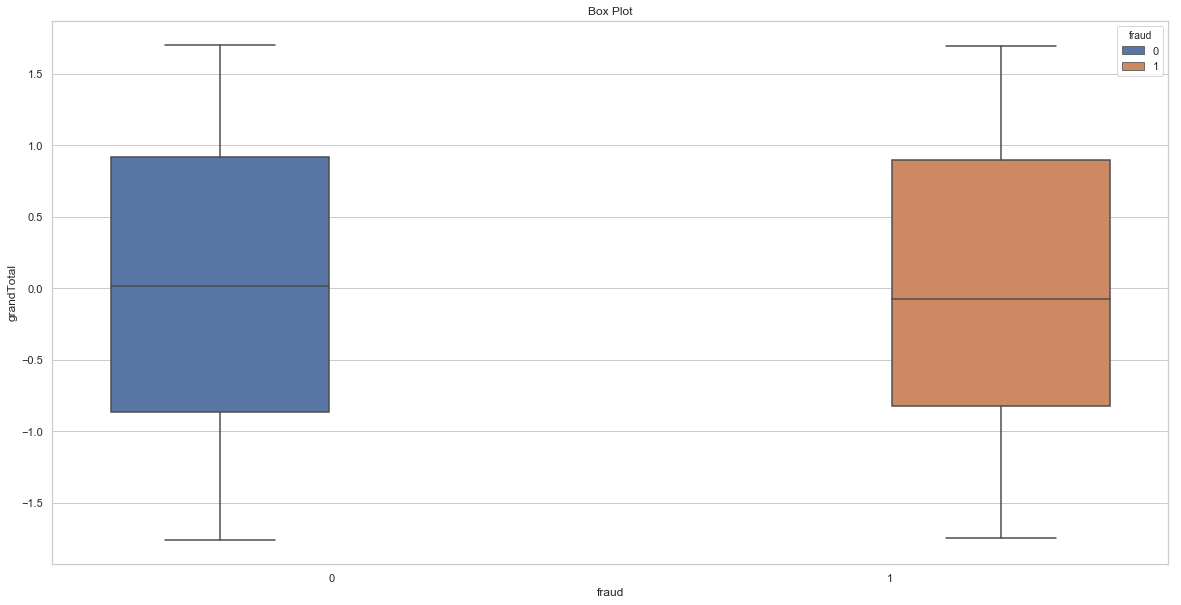

In [66]:
f,ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x="fraud", y='grandTotal', hue="fraud", data=df_cpy)
plt.title("Box Plot")
plt.show()

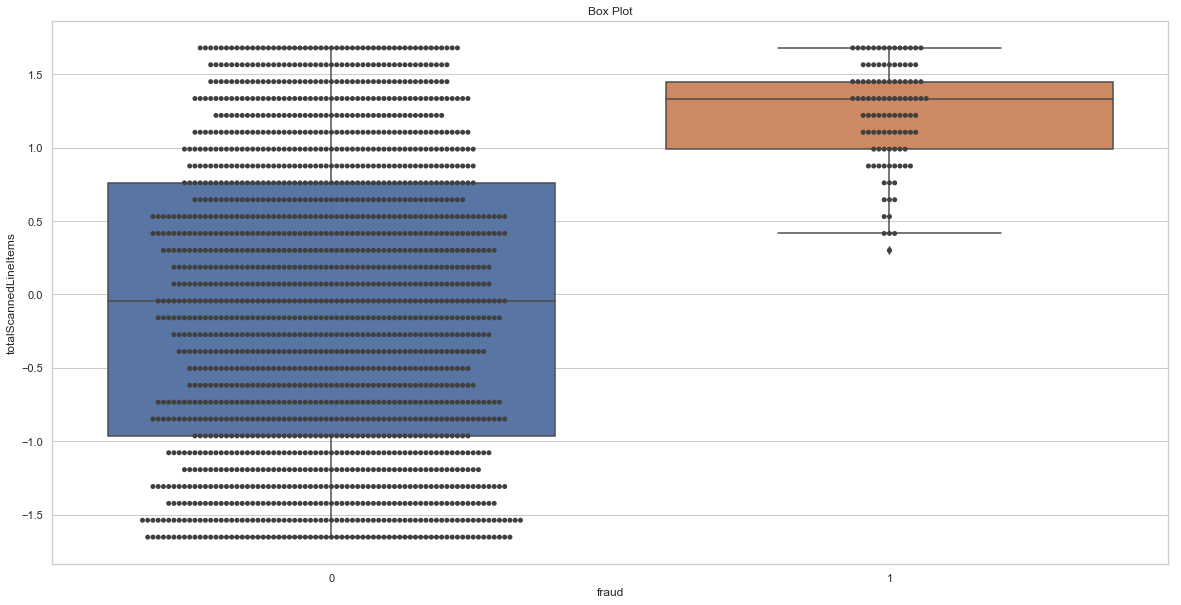

'#%%\nf,ax = plt.subplots(figsize=(20, 10))\nax = sns.violinplot(x="fraud", y=\'totalScannedLineItems\', data=df_cpy)\nax = sns.swarmplot(x="fraud", y="totalScannedLineItems", data=df_cpy, color=".25")\nplt.title("Box Plot")\nplt.show()\n'

In [67]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(x="fraud", y='totalScannedLineItems', data=df_cpy)
ax = sns.swarmplot(x="fraud", y="totalScannedLineItems", data=df_cpy, color=".25")
plt.title("Box Plot")
plt.show()

"""#%%
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.violinplot(x="fraud", y='totalScannedLineItems', data=df_cpy)
ax = sns.swarmplot(x="fraud", y="totalScannedLineItems", data=df_cpy, color=".25")
plt.title("Box Plot")
plt.show()
"""


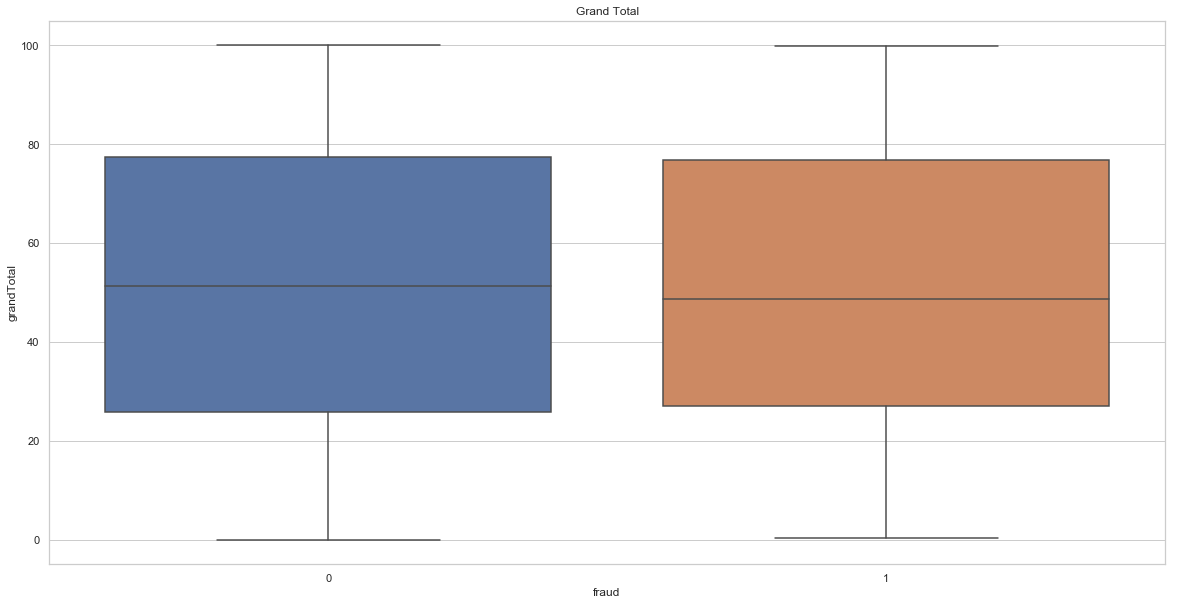

In [68]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(x="fraud", y='grandTotal', data=df_train)
#ax = sns.swarmplot(x="fraud", y="totalScannedLineItems", data=df_cpy, color=".25")
plt.title("Grand Total")
plt.show()

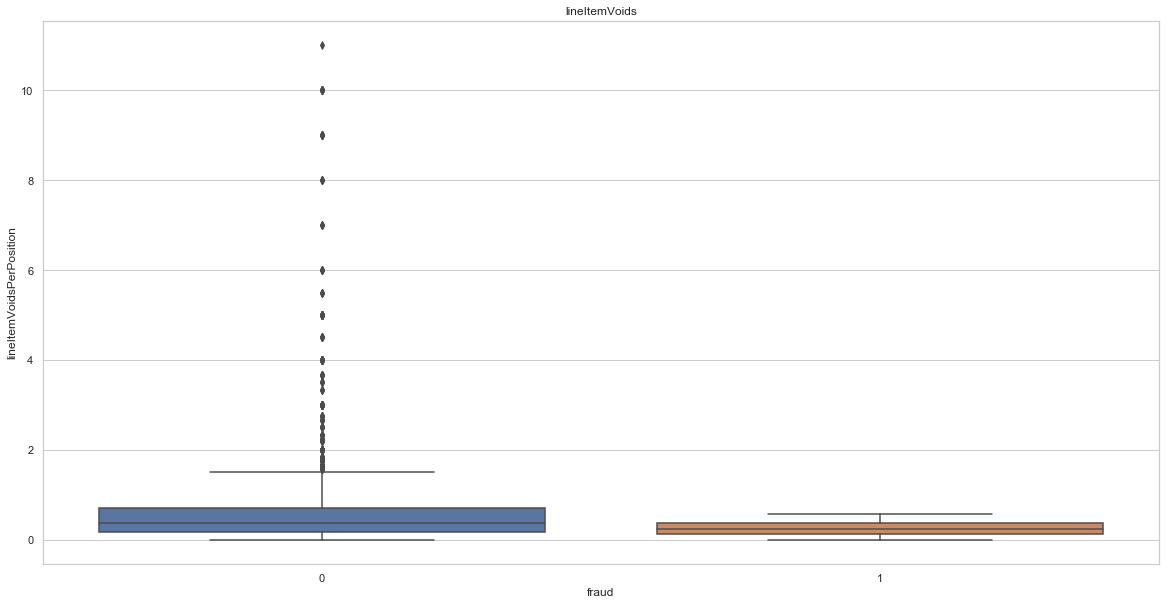

In [69]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(x="fraud", y='lineItemVoidsPerPosition', data=df_train)
#ax = sns.swarmplot(x="fraud", y="totalScannedLineItems", data=df_cpy, color=".25")
plt.title("lineItemVoids")
plt.show()

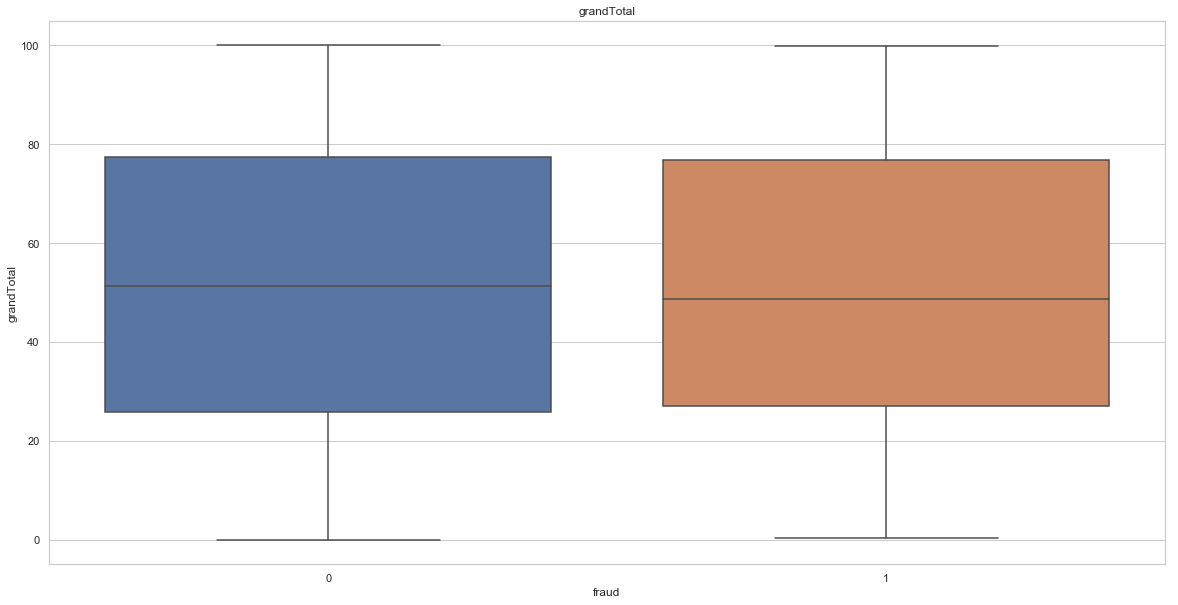

In [70]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(x="fraud", y='grandTotal', data=df_train)
#ax = sns.swarmplot(x="fraud", y="totalScannedLineItems", data=df_cpy, color=".25")
plt.title("grandTotal")
plt.show()

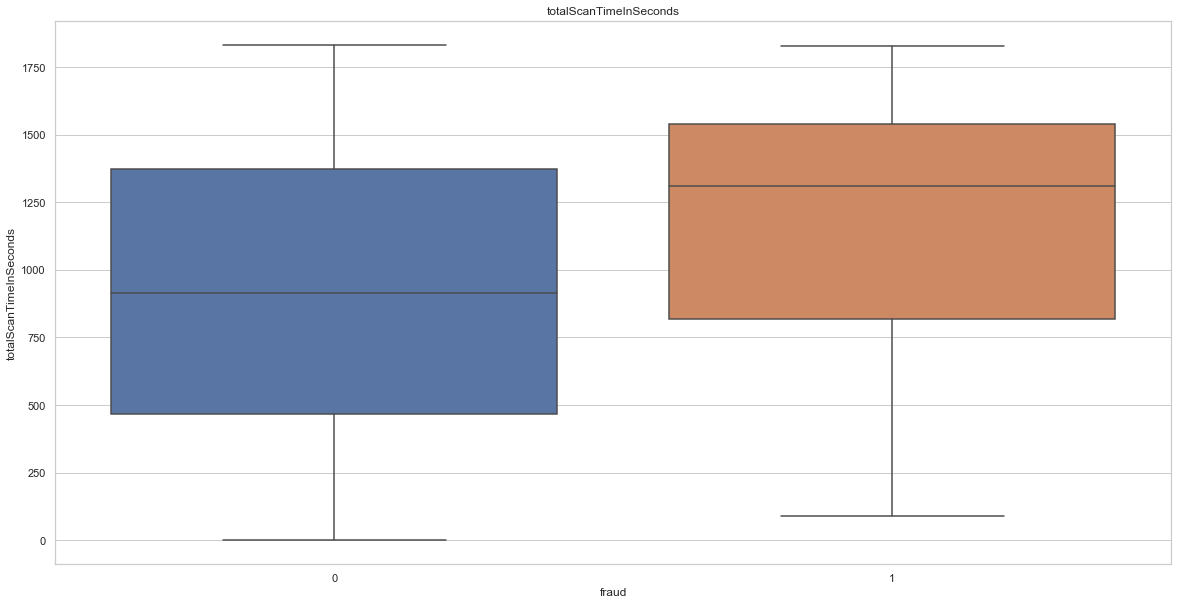

In [71]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(x="fraud", y='totalScanTimeInSeconds', data=df_train)
#ax = sns.swarmplot(x="fraud", y="totalScannedLineItems", data=df_cpy, color=".25")
plt.title("totalScanTimeInSeconds")
plt.show()

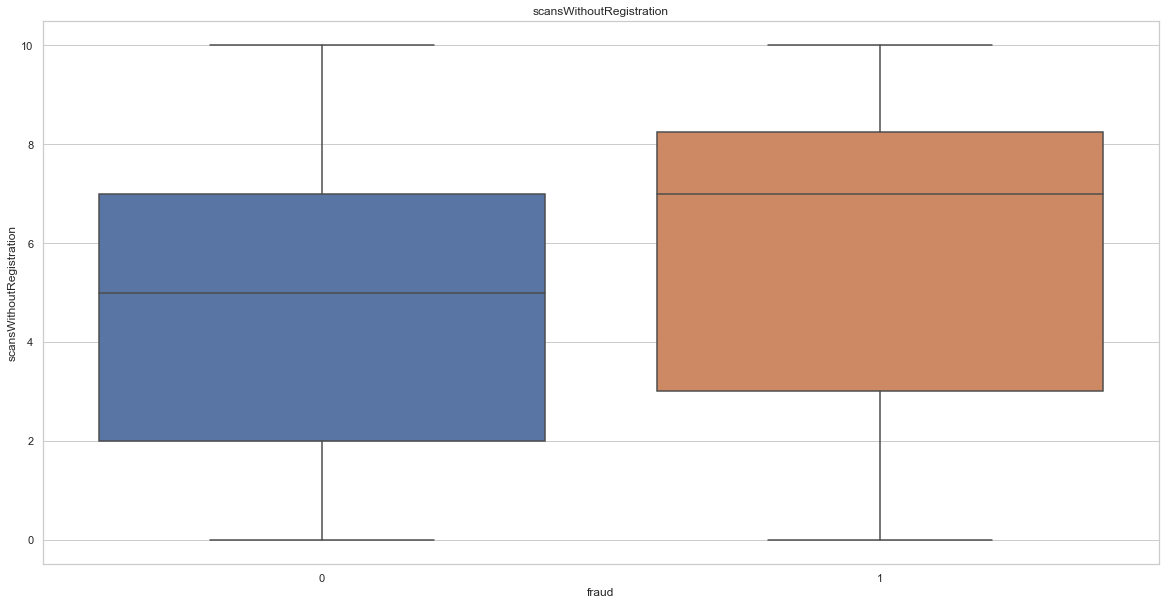

In [72]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(x="fraud", y='scansWithoutRegistration', data=df_train)
#ax = sns.swarmplot(x="fraud", y="totalScannedLineItems", data=df_cpy, color=".25")
plt.title("scansWithoutRegistration")
plt.show()

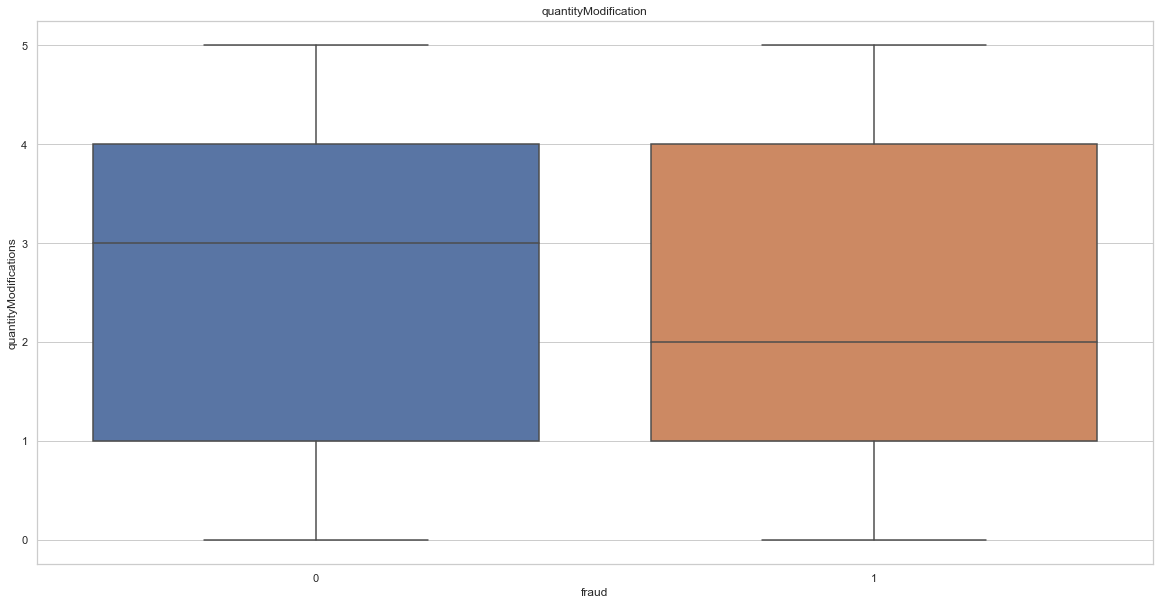

In [73]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(x="fraud", y='quantityModifications', data=df_train)
#ax = sns.swarmplot(x="fraud", y="totalScannedLineItems", data=df_cpy, color=".25")
plt.title("quantityModification")
plt.show()

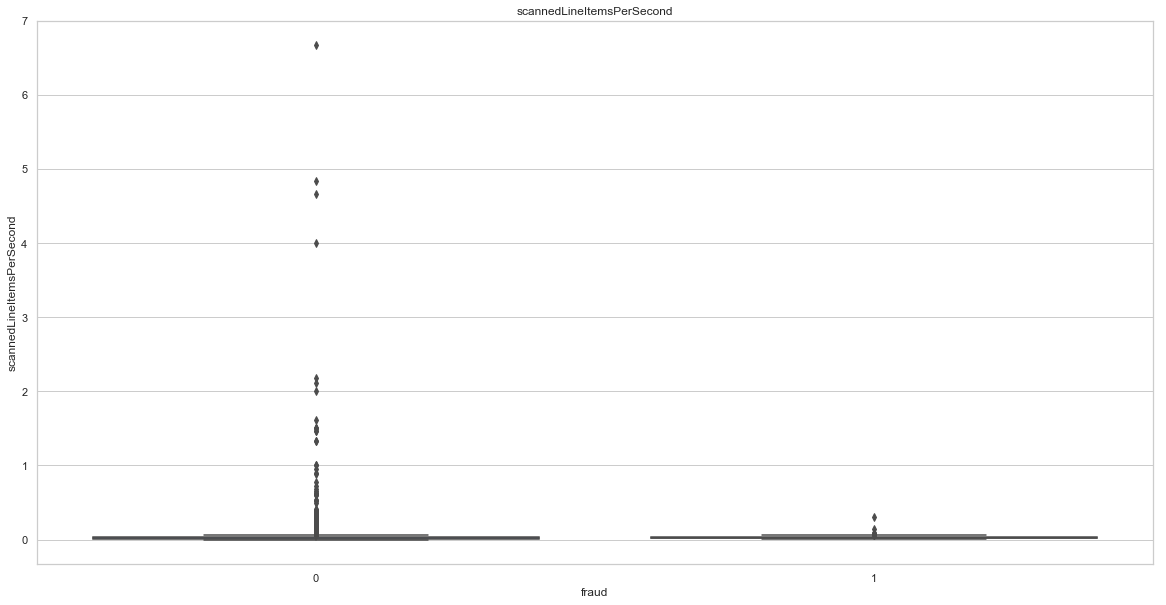

In [74]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(x="fraud", y='scannedLineItemsPerSecond', data=df_train)
#ax = sns.swarmplot(x="fraud", y="totalScannedLineItems", data=df_cpy, color=".25")
plt.title("scannedLineItemsPerSecond")
plt.show()

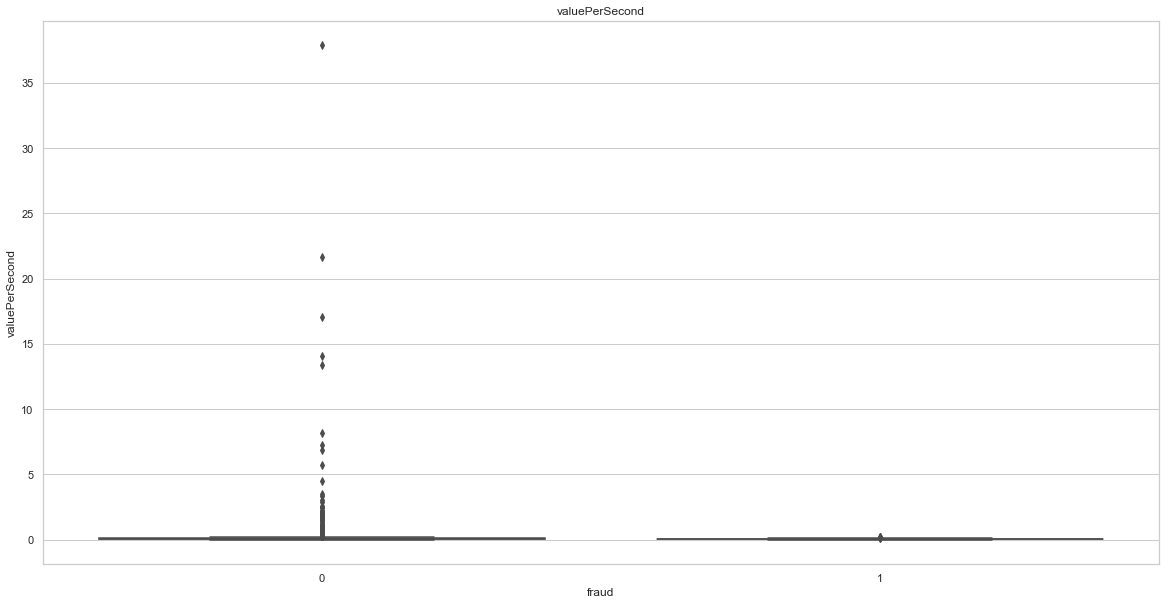

In [75]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(x="fraud", y='valuePerSecond', data=df_train)
#ax = sns.swarmplot(x="fraud", y="totalScannedLineItems", data=df_cpy, color=".25")
plt.title("valuePerSecond")
plt.show()

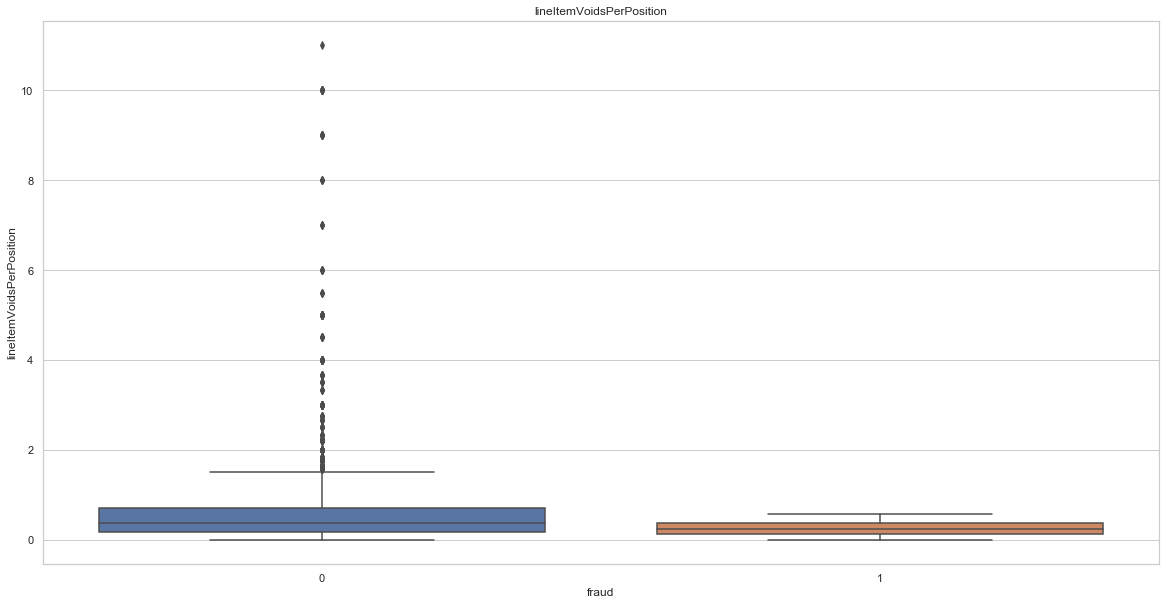

In [76]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(x="fraud", y='lineItemVoidsPerPosition', data=df_train)
#ax = sns.swarmplot(x="fraud", y="totalScannedLineItems", data=df_cpy, color=".25")
plt.title("lineItemVoidsPerPosition")
plt.show()

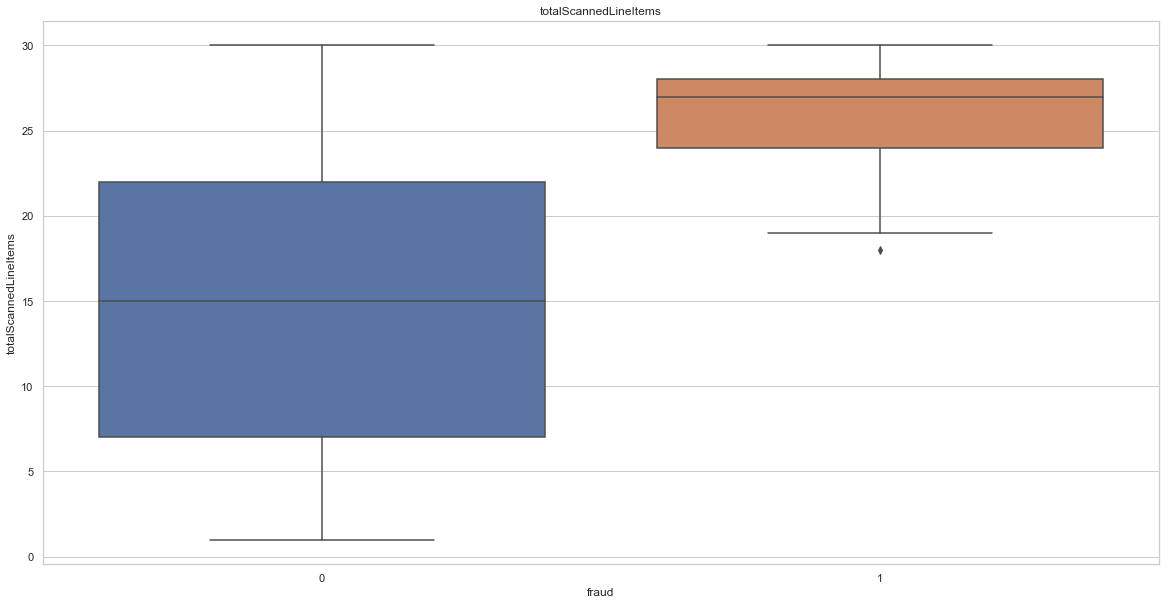

In [77]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(x="fraud", y='totalScannedLineItems', data=df_train)
#ax = sns.swarmplot(x="fraud", y="totalScannedLineItems", data=df_cpy, color=".25")
plt.title("totalScannedLineItems")
plt.show()

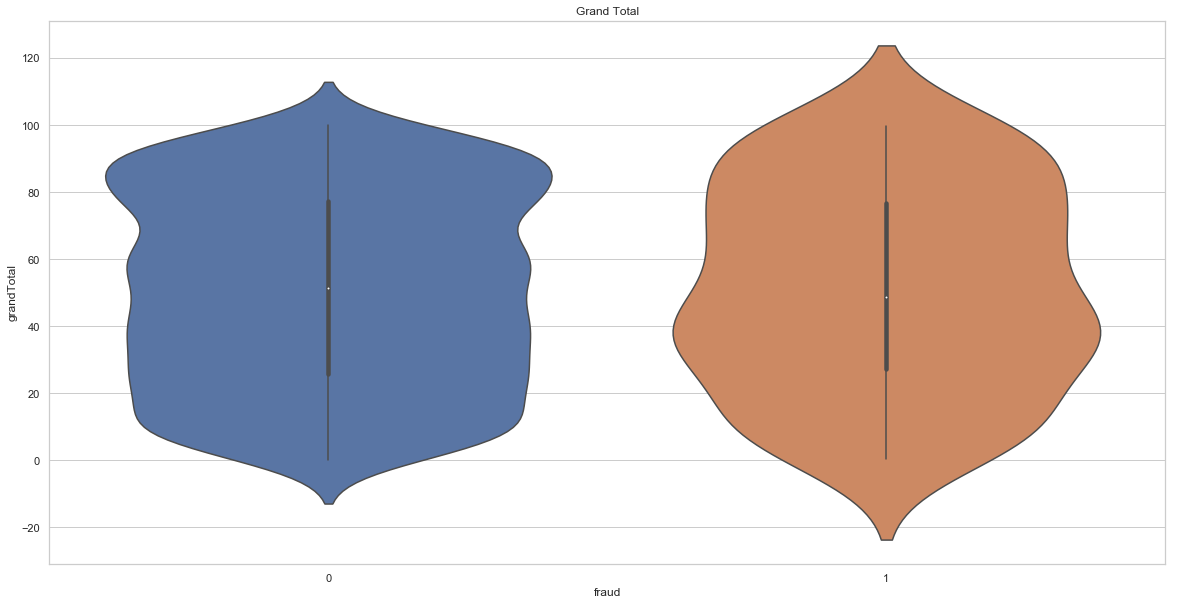

In [78]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.violinplot(x="fraud", y='grandTotal', data=df_train)
#ax = sns.swarmplot(x="fraud", y="totalScannedLineItems", data=df_cpy, color=".25")
plt.title("Grand Total")
plt.show()

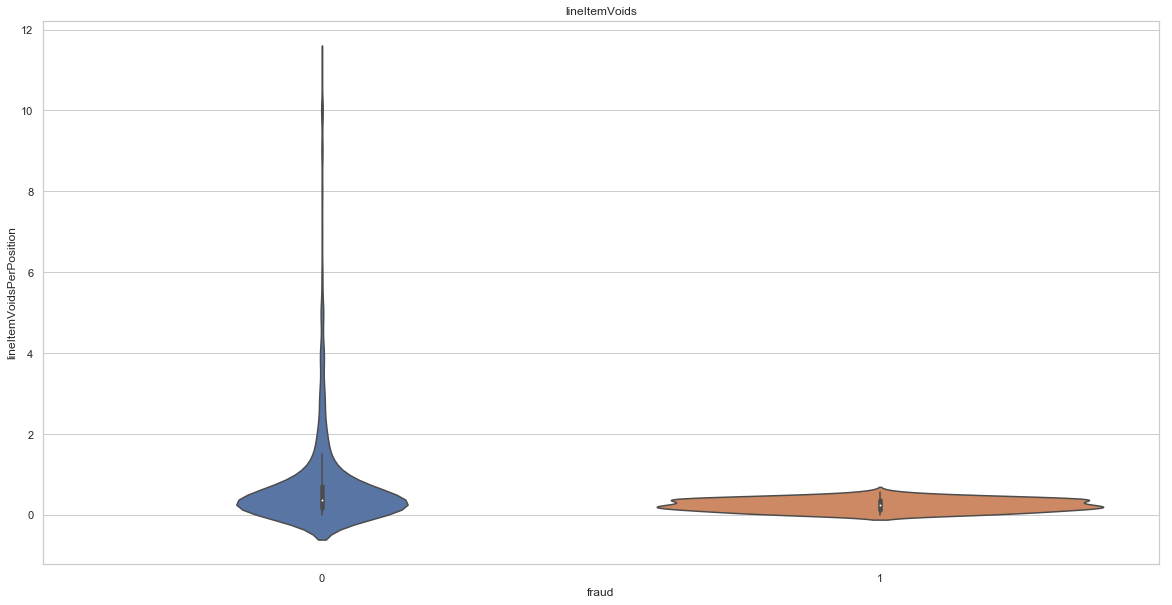

In [79]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.violinplot(x="fraud", y='lineItemVoidsPerPosition', data=df_train)
#ax = sns.swarmplot(x="fraud", y="totalScannedLineItems", data=df_cpy, color=".25")
plt.title("lineItemVoids")
plt.show()

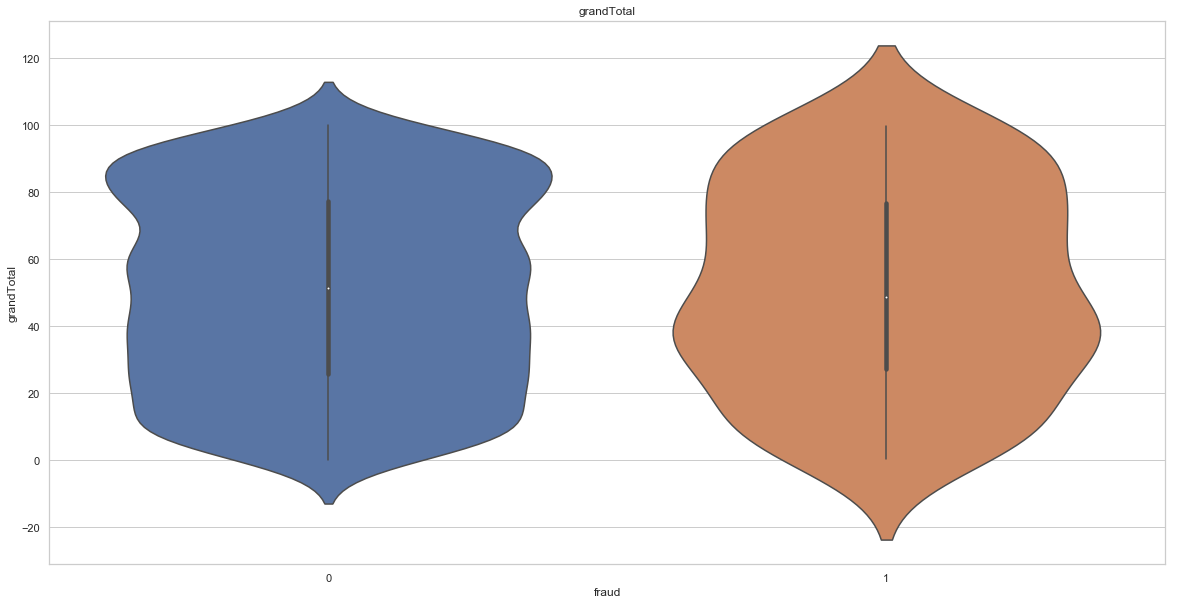

In [80]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.violinplot(x="fraud", y='grandTotal', data=df_train)
#ax = sns.swarmplot(x="fraud", y="totalScannedLineItems", data=df_cpy, color=".25")
plt.title("grandTotal")
plt.show()

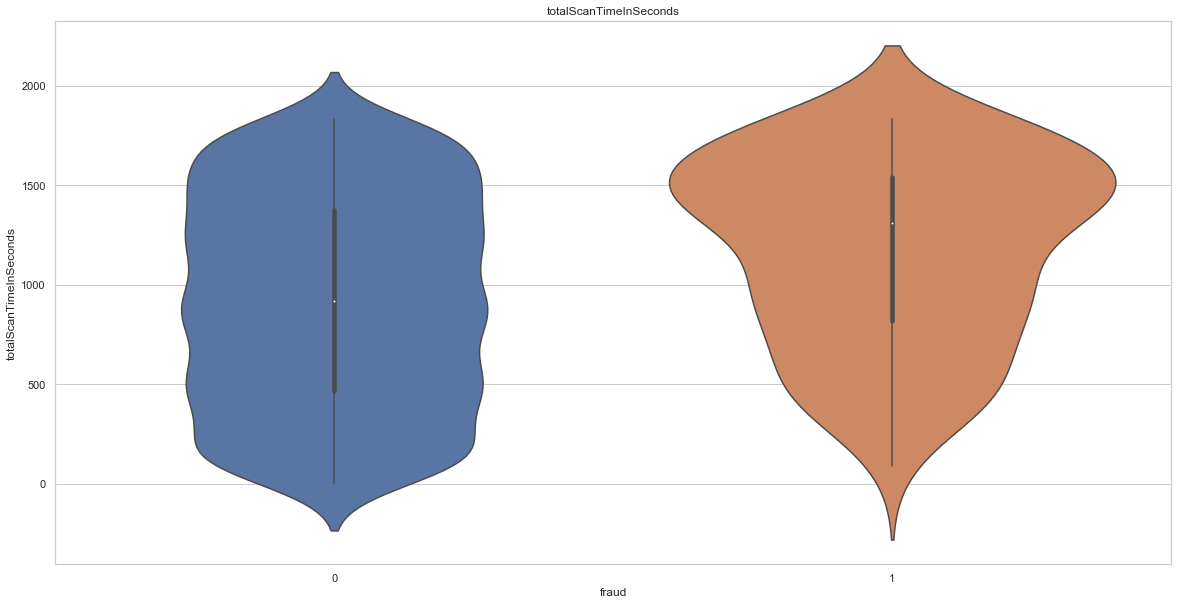

In [81]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.violinplot(x="fraud", y='totalScanTimeInSeconds', data=df_train)
#ax = sns.swarmplot(x="fraud", y="totalScannedLineItems", data=df_cpy, color=".25")
plt.title("totalScanTimeInSeconds")
plt.show()

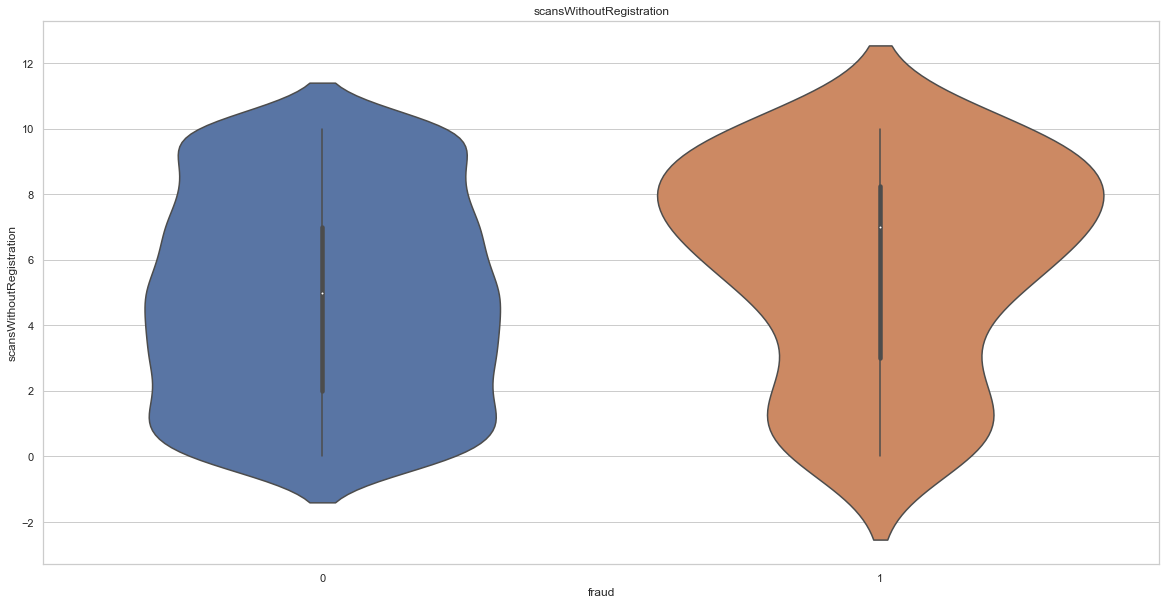

In [82]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.violinplot(x="fraud", y='scansWithoutRegistration', data=df_train)
#ax = sns.swarmplot(x="fraud", y="totalScannedLineItems", data=df_cpy, color=".25")
plt.title("scansWithoutRegistration")
plt.show()

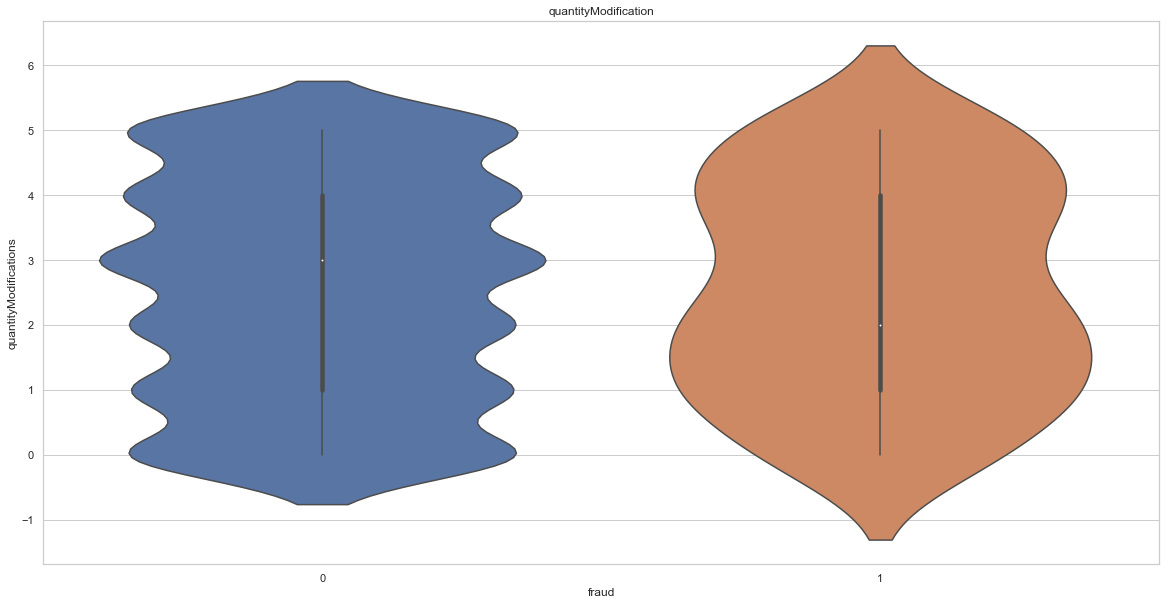

In [83]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.violinplot(x="fraud", y='quantityModifications', data=df_train)
#ax = sns.swarmplot(x="fraud", y="totalScannedLineItems", data=df_cpy, color=".25")
plt.title("quantityModification")
plt.show()

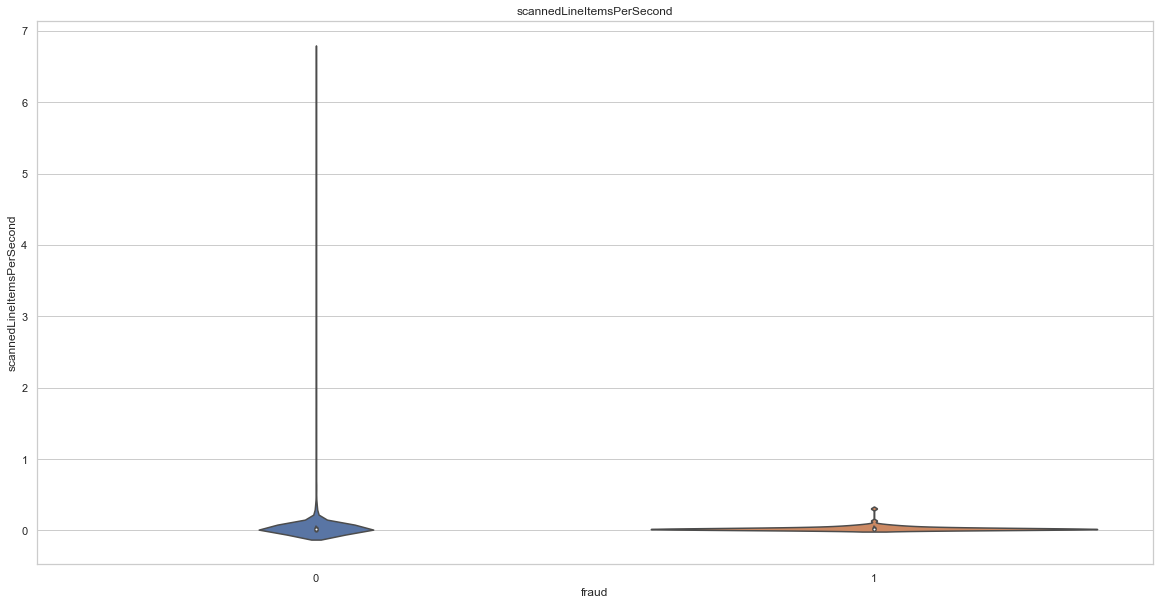

In [84]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.violinplot(x="fraud", y='scannedLineItemsPerSecond', data=df_train)
#ax = sns.swarmplot(x="fraud", y="totalScannedLineItems", data=df_cpy, color=".25")
plt.title("scannedLineItemsPerSecond")
plt.show()

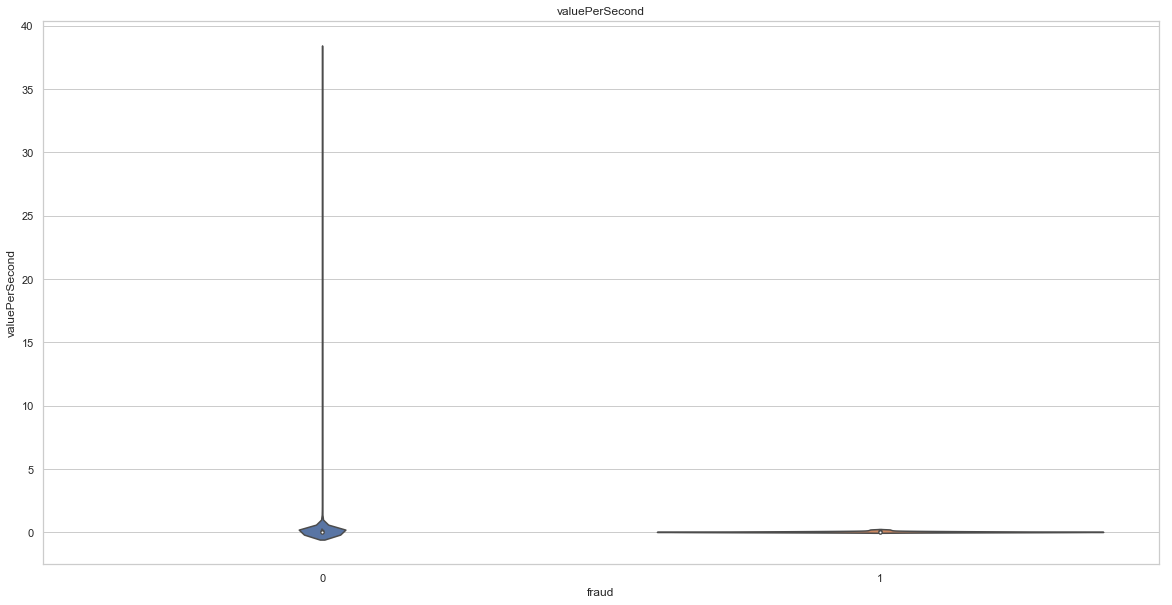

In [85]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.violinplot(x="fraud", y='valuePerSecond', data=df_train)
#ax = sns.swarmplot(x="fraud", y="totalScannedLineItems", data=df_cpy, color=".25")
plt.title("valuePerSecond")
plt.show()

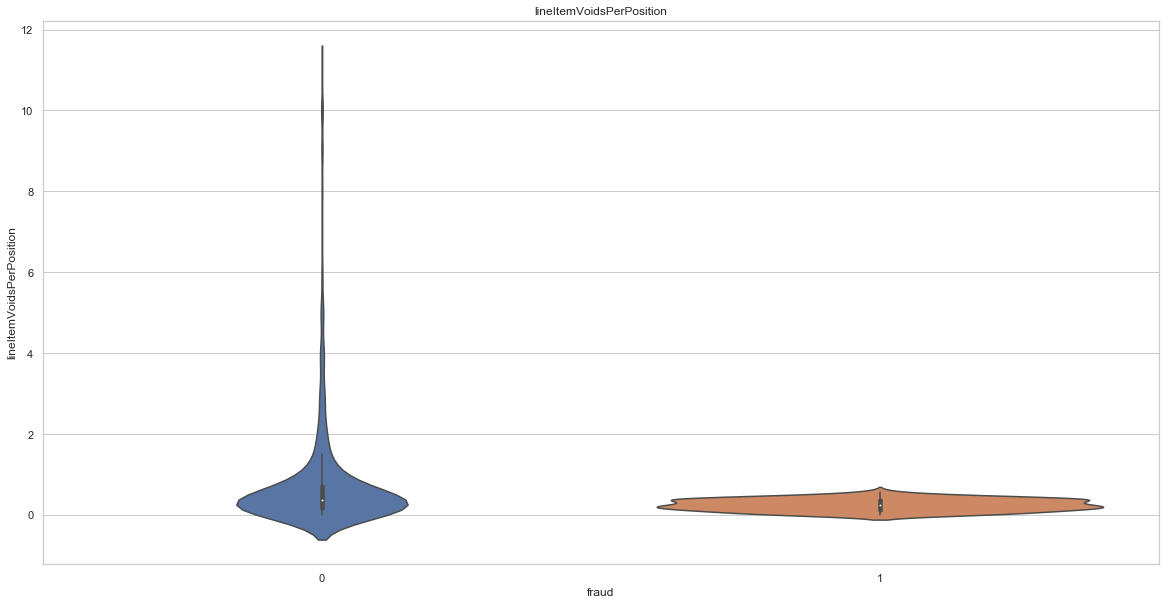

In [87]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.violinplot(x="fraud", y='lineItemVoidsPerPosition', data=df_train)
#ax = sns.swarmplot(x="fraud", y="totalScannedLineItems", data=df_cpy, color=".25")
plt.title("lineItemVoidsPerPosition")
plt.show()

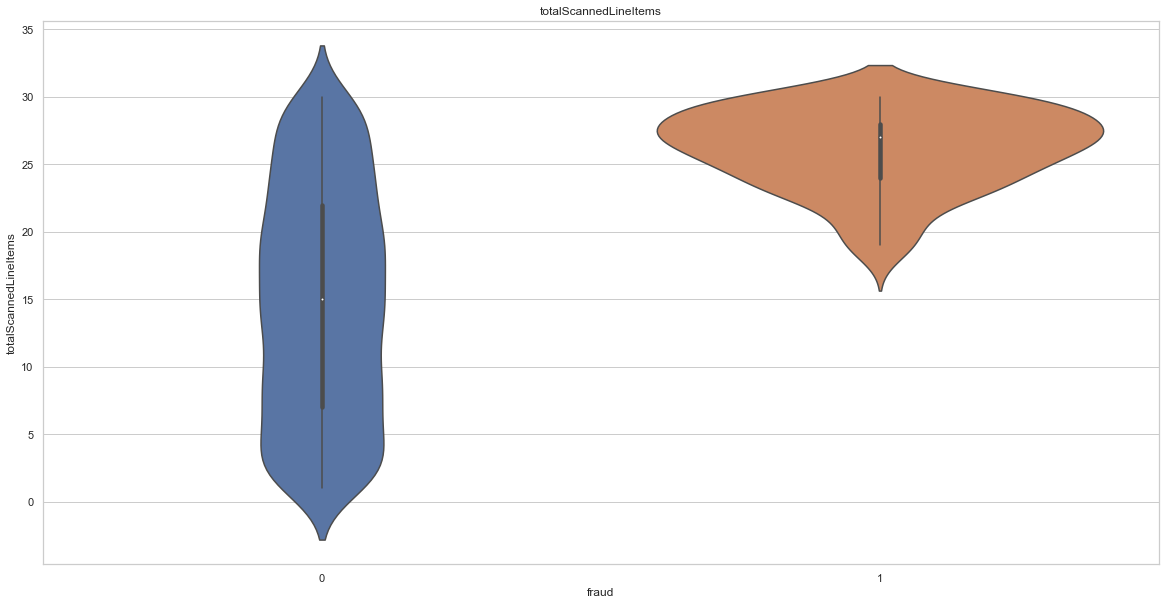

In [88]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.violinplot(x="fraud", y='totalScannedLineItems', data=df_train)
#ax = sns.swarmplot(x="fraud", y="totalScannedLineItems", data=df_cpy, color=".25")
plt.title("totalScannedLineItems")
plt.show()
